In [3]:
import pandas as pd
import ast
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\sunse\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
df_DA_US=df[(df['job_title_short']=='Data Analyst') & (df['job_country']=='United States')].copy()

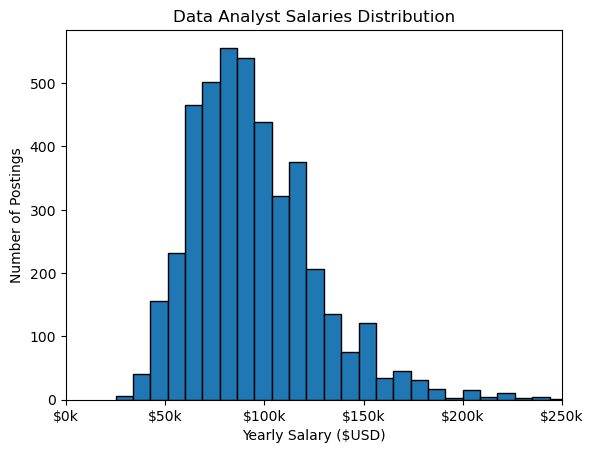

In [6]:
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

Text(0.5, 0, '')

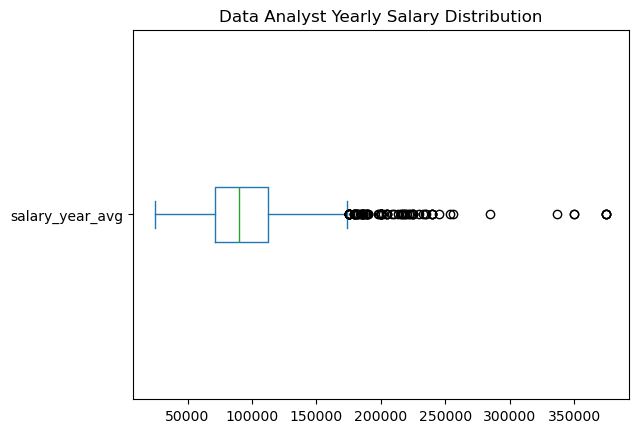

In [11]:
df_DA_US['salary_year_avg'].plot(kind='box',vert=False)
plt.title('Data Analyst Yearly Salary Distribution')
plt.xlabel('')

C:\Users\sunse\AppData\Local\Temp\ipykernel_31860\703075176.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list,labels=job_titles,vert=False)


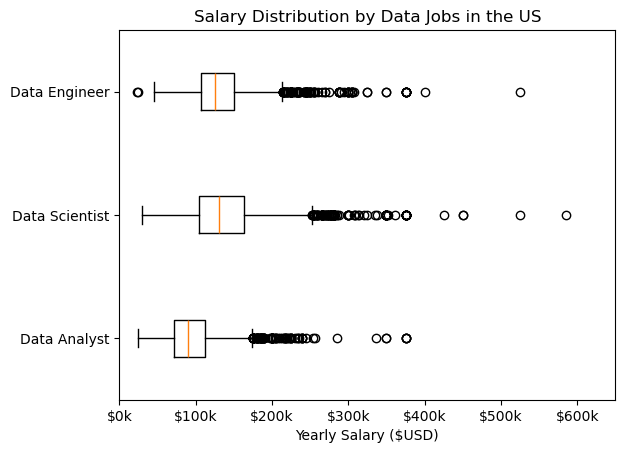

In [18]:
job_titles=['Data Analyst','Data Scientist','Data Engineer']
df_US=df[(df['job_title_short'].isin(job_titles)) & (df['job_country']=='United States')].copy()
df_US=df_US.dropna(subset=['salary_year_avg'])
job_list= [df_US[df_US['job_title_short']==job_title]['salary_year_avg']  for job_title in job_titles]

plt.boxplot(job_list,labels=job_titles,vert=False)
plt.title('Salary Distribution by Data Jobs in the US')
plt.xlabel('Yearly Salary ($USD)')
ax = plt.gca()
plt.xlim(0,650000)
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}k'))
plt.show()